<a href="https://colab.research.google.com/github/tgalkovskyi/deep-text-recognition-benchmark/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This can be executed in https://colab.research.google.com "Python 3 / GPU" runtime.

In [ ]:
# !git clone https://github.com/clovaai/deep-text-recognition-benchmark
# %cd deep-text-recognition-benchmark

Next, download large model files from Google Drive, using hack: https://stackoverflow.com/questions/20665881/direct-download-from-google-drive-using-google-drive-api/32742700#32742700

In [ ]:
# models = {
#     'None-ResNet-None-CTC.pth': 'https://drive.google.com/open?id=1FocnxQzFBIjDT2F9BkNUiLdo1cC3eaO0',
#     'None-VGG-BiLSTM-CTC.pth': 'https://drive.google.com/open?id=1GGC2IRYEMQviZhqQpbtpeTgHO_IXWetG',
#     'None-VGG-None-CTC.pth': 'https://drive.google.com/open?id=1FS3aZevvLiGF1PFBm5SkwvVcgI6hJWL9',
#     'TPS-ResNet-BiLSTM-Attn-case-sensitive.pth': 'https://drive.google.com/open?id=1ajONZOgiG9pEYsQ-eBmgkVbMDuHgPCaY',
#     'TPS-ResNet-BiLSTM-Attn.pth': 'https://drive.google.com/open?id=1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9',
#     'TPS-ResNet-BiLSTM-CTC.pth': 'https://drive.google.com/open?id=1FocnxQzFBIjDT2F9BkNUiLdo1cC3eaO0',
# }

# for k, v in models.items():
#   doc_id = v[v.find('=')+1:]
#   !curl -c /tmp/cookies "https://drive.google.com/uc?export=download&id=$doc_id" > /tmp/intermezzo.html
#   !curl -L -b /tmp/cookies "https://drive.google.com$(cat /tmp/intermezzo.html | grep -Po 'uc-download-link" [^>]* href="\K[^"]*' | sed 's/\&amp;/\&/g')" > $k

# !ls -al *.pth

In [10]:
output = !python demo.py --image_folder demo_image_en/ --saved_mode saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth
# --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
# --image_folder demo_image/ \
# --saved_model saved_models/PreTrained/TPS-ResNet-BiLSTM-Attn-case-sensitive.pth --sensitive

,img,id,label,conf
0,,demo_image_en/word_1.png,fire,0.9977
1,,demo_image_en/word_17.png,das,0.2549
2,,demo_image_en/word_92.png,scan,0.9997
3,,demo_image_en/word_137.png,i,0.6354
4,,demo_image_en/word_240.png,export,0.9840
5,,demo_image_en/word_495.png,starbucks,0.9956

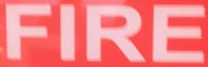
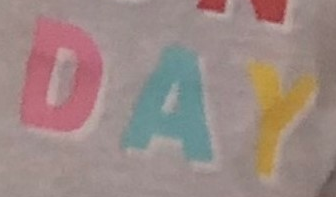
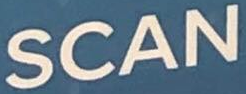
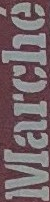
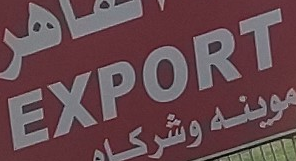
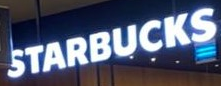

In [11]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()
  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))